In [13]:
from __future__ import division
import numpy as np
import pandas as pd
import numpy.random as rd
import tarfile, sys, os

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns

sns.set(style="darkgrid", palette="muted", color_codes=True) 
    
from sklearn.datasets import fetch_mldata
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from IPython.display import Image
from sklearn.externals.six import StringIO  
import pydot 
from scipy import ndimage
from six.moves.urllib.request import urlretrieve

In [2]:
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))
    
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

### ジニ係数


$$\mathcal{I}(t) = \sum_{i\neq j}P(C_i|t)P(C_j|t) =  \sum_{i=1}^K P(C_i|t)(1-P(C_i|t))$$


$$\mathcal{I}(t) = 1 - \sum_{i=1}^K P(C_i|t)^2$$

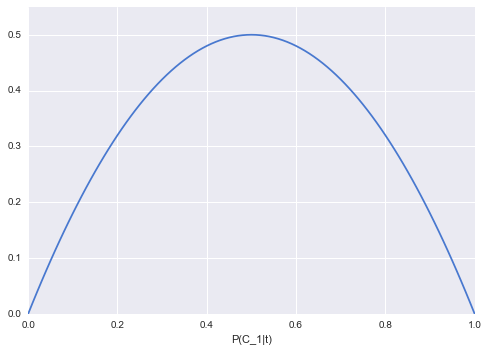

In [4]:
p1 = np.linspace(0,1,101)
p2 = 1 - p1
I  = 1 - p1**2 - p2**2

plt.ylim(0, 0.55)
plt.plot(p1,I)
plt.xlabel('P(C_1|t)')


In [12]:
cm = generate_cmap(['salmon', 'salmon', 'salmon', 'lightblue', 'blue', 'blue', 'blue', 'blue'])

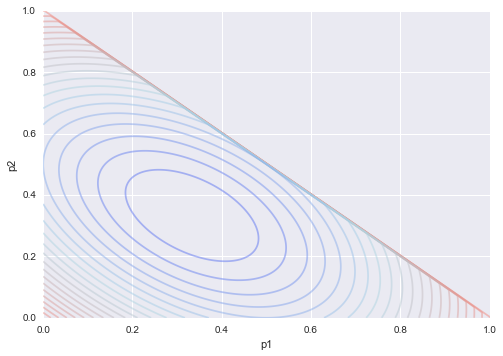

In [15]:
def gini_3class(X, Y):
    ret_list = []
    for x, y in zip(X, Y):    
        if x + y > 1: 
            ret_list.append(0)
            continue
        z = (1-x-y)
        ret_list.append(1-x**2 - y**2 - z**2)
    return np.array(ret_list)

n = 301
X, Y = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
Z = gini_3class(X.flatten(), Y.flatten()).reshape(n, n)

interval = [i/30. -1 for i in range(100)]
im = plt.contour(X, Y, Z, interval, alpha=0.5, cmap=cm)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('p1')
plt.ylabel('p2')

In [99]:
#class1 = np.array([[1.5, 3.1], [2.1, 6.4], [2.8, 0.5], [6.3, 2.1]])
#class2 = np.array([[3.2, 4.1], [5.2, 8.1], [7.3, 5.5], [8.5, 1.6], [9.2, 6.9]])
#all_data = np.r_[class1, class2]
#col = (['b']*len(class1) + ['r']*len(class2))
#marker = "".join((['o']*len(class1) + ['x']*len(class2)))
#N = len(all_data)
#
#x_sorted = np.sort(all_data[:,0])
#y_sorted = np.sort(all_data[:,1])
#
#xx = [(x_sorted[i+1] + x_sorted[i])/2 for i in range(len(x_sorted)-1)]
#yy = [(y_sorted[i+1] + y_sorted[i])/2 for i in range(len(y_sorted)-1)]

In [91]:
#[x for x in all_data[:len(all_data)-1,0]]

In [112]:
#xx

In [138]:
#[['{0:.2f}'.format(x), np.sum(class1[:,0] < x)] for x in xx]

|axis|value|ratio_l|gini_l|ratio_r|gini_r|gini dalta|
|:-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|x|1.8|0.111|0.000 |0.889|0.469 |0.417|
|x|2.45|0.222|0.000 |0.778|0.408 |0.317|
|x|3.0|0.333|0.000 |0.667|0.278 |0.185|
|x|4.2|0.444|0.375 |0.556|0.320 |0.344|
|x|5.75|0.556|0.480 |0.444|0.375 |0.433|
|x|6.8|0.667|0.444 |0.333|0.000 |0.296|
|x|7.9|0.778|0.490 |0.222|0.000 |0.381|
|x|8.85|0.889|0.500 |0.111|0.000 |0.444|
|y|1.05|0.111|0.000 |0.889|0.469 |0.417|
|y|1.85|0.222|0.500 |0.778|0.490 |0.492|
|y|2.6|0.333|0.444 |0.667|0.444 |0.444|
|y|3.6|0.444|0.375 |0.556|0.320 |0.344|
|y|4.8|0.556|0.480 |0.444|0.375 |0.433|
|y|5.95|0.667|0.500 |0.333|0.444 |0.481|
|y|6.65|0.778|0.490 |0.222|0.000 |0.381|
|y|7.5|0.889|0.500 |0.111|0.000 |0.444|
min_gini: 0.185185185185
min_val: x 3.0


(0, 10)

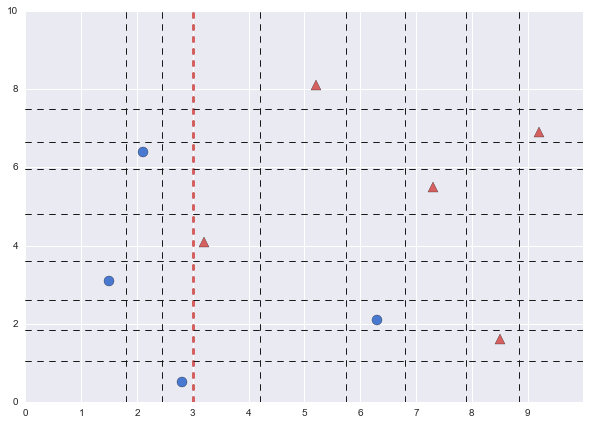

In [7]:
# テストデータの作成
class1 = np.array([[1.5, 3.1], [2.1, 6.4], [2.8, 0.5], [6.3, 2.1]])
class2 = np.array([[3.2, 4.1], [5.2, 8.1], [7.3, 5.5], [8.5, 1.6], [9.2, 6.9]])
all_data = np.r_[class1, class2]
N = len(all_data)
x_sorted = np.sort(all_data[:,0])
y_sorted = np.sort(all_data[:,1])

xx = [(x_sorted[i+1] + x_sorted[i])/2 for i in range(len(x_sorted)-1)]
yy = [(y_sorted[i+1] + y_sorted[i])/2 for i in range(len(y_sorted)-1)]

# ----------------------------------------
plt.figure(figsize=(10,7))

for data, col, marker in zip([class1, class2], 'br', 'o^'):
    plt.scatter(data[:,0], data[:,1], c=col, marker=marker, s=100)
    
min_gini = 1
axis = ''
min_val  = 0

print "|axis|value|ratio_l|gini_l|ratio_r|gini_r|gini dalta|"
print "|:-----:|-----:|-----:|-----:|-----:|-----:|-----:|"

# x_1軸での分割
for x in xx:
    plt.plot([x, x], [0, 10], 'k--', lw=1)
    
    # 分割の左側の個数(クラスごと、合計の数)
    n_c1_l = np.sum(class1[:,0] < x)
    n_c2_l = np.sum(class2[:,0] < x)
    n_l    = n_c1_l + n_c2_l
    
    # 分割した左側のgini係数
    gini_l = 1 - (n_c1_l/n_l)**2 - (n_c2_l/n_l)**2
    
    # 分割の右側の個数(クラスごと、合計の数)
    n_c1_r = np.sum(class1[:,0] >= x)
    n_c2_r = np.sum(class2[:,0] >= x)
    n_r    = n_c1_r + n_c2_r
    
    # 分割した右側のgini係数
    gini_r = 1 - (n_c1_r/n_r)**2 - (n_c2_r/n_r)**2
    
    # 左右合わせた平均gini係数
    ratio_l = n_l/(n_l+n_r)
    ratio_r = 1 - ratio_l
    ave_gini = ratio_l*gini_l + ratio_r*gini_r
      
    #print "|x:{0} | ratio_l:{1:.3f} | ratio_r:{2:.3f} | gini dalta:{3:.3f}|".format(
    print "|x|{0}|{1:.3f}|{2:.3f} |{3:.3f}|{4:.3f} |{5:.3f}|".format(
           x, ratio_l,gini_l, ratio_r,gini_r, ave_gini)
    
    # 平均gini係数が最小であれば保管しておく
    if min_gini > ave_gini:
        min_gini = ave_gini 
        min_val = x
        axis = 'x'
    
    
for y in yy:
    plt.plot([0, 10], [y, y], 'k--', lw=1)
    
    # 分割の下側の個数(クラスごと、合計の数)
    n_c1_l = np.sum(class1[:,1] < y)
    n_c2_l = np.sum(class2[:,1] < y)
    n_l    = n_c1_l + n_c2_l
    
    # 分割した下側のgini係数
    gini_l = 1 - (n_c1_l/n_l)**2 - (n_c2_l/n_l)**2
    
    # 分割の上側の個数(クラスごと、合計の数)
    n_c1_r = np.sum(class1[:,1] >= y)
    n_c2_r = np.sum(class2[:,1] >= y)
    n_r    = n_c1_r + n_c2_r
    
    # 分割した上側のgini係数
    gini_r = 1 - (n_c1_r/n_r)**2 - (n_c2_r/n_r)**2
    
    # 左右合わせた平均gini係数
    ratio_l = n_l/(n_l+n_r)
    ratio_r = 1 - ratio_l
    ave_gini = ratio_l*gini_l + ratio_r*gini_r
    
    #print "|y:{0} | ratio_l:{1:.3f} | ratio_r:{2:.3f} | gini dalta:{3:.3f}|".format(
    print "|y|{0}|{1:.3f}|{2:.3f} |{3:.3f}|{4:.3f} |{5:.3f}|".format(
           y, ratio_l,gini_l, ratio_r,gini_r, ave_gini)

    # 平均gini係数が最小であれば保管しておく
    if min_gini > ave_gini:
        min_gini = ave_gini
        min_val = y
        axis = 'y'

print "min_gini:", min_gini
print "min_val:", axis, min_val

# 分割線の描画(最良の分割を赤い線で描画)
for x in xx:
    if axis == 'x' and x == min_val:
        plt.plot([x, x], [0, 10], 'r--', lw=3)  
    else:
        plt.plot([x, x], [0, 10], 'k--', lw=1)     
    
for y in yy:
    if axis == 'y' and y == min_val:
        plt.plot([0, 10], [y, y], 'r--', lw=3) 
    else:
        plt.plot([0, 10], [y, y], 'k--', lw=1)
        
    
plt.xticks(range(10))
plt.xlim(0,10)
plt.ylim(0,10)

### 決定木による分類

In [9]:
print 'fetch MNIST dataset'
mnist = fetch_mldata('MNIST original')
# mnist.data : 70,000件の784次元ベクトルデータ
mnist.data   = mnist.data.astype(np.float32)
mnist.data  /= 255     # 0-1のデータに変換

# mnist.target : 正解データ（教師データ）
mnist.target = mnist.target.astype(np.int32)

fetch MNIST dataset


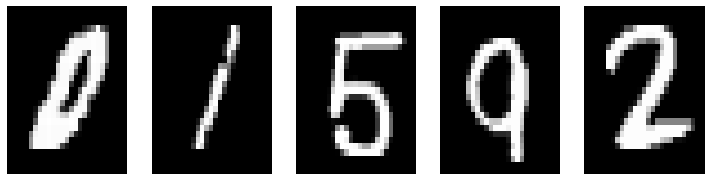

In [10]:
# 手書き数字データを描画する関数
def draw_digit(digits):
    size = 28
    plt.figure(figsize=(len(digits)*2.5, 3))
    for i, data in enumerate(digits):
        plt.subplot(1, len(digits), i+1)
        X, Y = np.meshgrid(range(size),range(size))
        Z = data.reshape(size,size)   # convert from vector to 28x28 matrix
        Z = Z[::-1,:]             # flip vertical
        plt.xlim(0,27)
        plt.ylim(0,27)
        plt.pcolor(X, Y, Z)
        plt.gray()
        plt.tick_params(labelbottom="off")
        plt.tick_params(labelleft="off")

    plt.show()

draw_digit([mnist.data[71], mnist.data[12345], mnist.data[33456], mnist.data[59187], mnist.data[12952], ])

In [11]:
# 学習用データを N個、検証用データを残りの個数と設定
N = 60000
x_train, x_test = np.split(mnist.data,   [N])
y_train, y_test = np.split(mnist.target, [N])


In [18]:
# 決定木によるモデル構築
clf_dt = tree.DecisionTreeClassifier(criterion='gini', splitter='best')
clf_dt = clf_dt.fit(x_train, y_train)

In [29]:
#　訓練データでの精度確認
pred = clf_dt.predict(x_train)
print "confusion matrix (train)"
print confusion_matrix(y_train, pred)
print ""
print "classification report (train)"
print classification_report(y_train, pred, target_names=map(str, range(10)))
print ""
print "accuracy (train)"
print accuracy_score(y_train, pred)

confusion matrix (train)
[[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]

classification report (train)
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      5923
          1       1.00      1.00      1.00      6742
          2       1.00      1.00      1.00      5958
          3       1.00      1.00      1.00      6131
          4       1.00      1.00      1.00      5842
          5       1.00      1.00      1.00      5421
          6       1.00      1.00      1.0

In [31]:
#　検証データでの精度確認

pred = clf_dt.predict(x_test)
print "confusion matrix (test)"
print confusion_matrix(y_test, pred)
print ""
print "classification report (test)"
print classification_report(y_test, pred, target_names=map(str, range(10)))
print ""
print "accuracy (test)"
print accuracy_score(y_test, pred)

confusion matrix (test)
[[ 915    0    8    5    6   11    8    2   15   10]
 [   0 1081    9    9    2    7    7    3   16    1]
 [  11   11  885   26   16    9   12   28   23   11]
 [   9    3   33  853    7   42    8   11   28   16]
 [   4    1    7    6  862   11   17   12   16   46]
 [  10    7    4   46    7  749   20    6   27   16]
 [  15    5   12    7   20   26  842    1   24    6]
 [   2   10   20   22    9    5    2  928    8   22]
 [  15    7   28   38   26   33   16    5  782   24]
 [  10    3   10   22   41   11    7   20   26  859]]

classification report (test)
             precision    recall  f1-score   support

          0       0.92      0.93      0.93       980
          1       0.96      0.95      0.96      1135
          2       0.87      0.86      0.86      1032
          3       0.82      0.84      0.83      1010
          4       0.87      0.88      0.87       982
          5       0.83      0.84      0.83       892
          6       0.90      0.88      0.89 

In [50]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(x_train, y_train)

In [49]:
scores = cross_val_score(clf, x_train, y_train)
scores.mean()


0.93898330035200717

In [59]:
# 再代入誤り率
pred = clf.predict(x_train)
result = [y==p for y, p in zip(y_train,pred)]
np.sum(result)/len(pred)

0.99924999999999997

In [60]:
# 汎化性能チェック
pred = clf.predict(x_test)
result = [y==p for y, p in zip(y_test,pred)]
np.sum(result)/len(pred)

0.94720000000000004

In [62]:
clf.get_params(deep=True)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1358023569, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=2071237134, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=1993547737, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None, min_sam

In [74]:
type(clf.estimators_[0])

sklearn.tree.tree.DecisionTreeClassifier

In [72]:
export_graphviz(clf.estimators_[0])

In [76]:

dot_data = StringIO()  
export_graphviz(clf.estimators_[0], out_file=dot_data,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

KeyboardInterrupt: 

In [78]:
dot_data = StringIO() 
export_graphviz(clf.estimators_[0], out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("mnist_graph.pdf") 

True

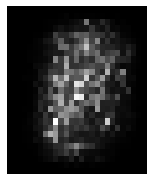

In [116]:
# 重要度の可視化
img = clf.feature_importances_.reshape(28,28)
draw_digit([img])

### 決定木の精度は？

In [112]:
clf_dt.tree_.max_depth

25

In [113]:
scores = cross_val_score(clf_dt, x_train, y_train, cv=5)
scores.mean()



0.86795047097960742

In [114]:
# 再代入誤り率
pred = clf_dt.predict(x_train)
result = [y==p for y, p in zip(y_train,pred)]
np.sum(result)/len(pred)

0.99733333333333329

In [115]:
# 汎化性能チェック
pred = clf_dt.predict(x_test)
result = [y==p for y, p in zip(y_test,pred)]
np.sum(result)/len(pred)

0.87809999999999999

In [20]:
x = rd.randn(50,2)
y = map(lambda x: 1 if x else 0 ,x[:,0] > x[:,1])
x0 = np.linspace(-3,3,101)
X, Y = np.meshgrid(x0, x0)

In [31]:
d = np.ceil(2*rd.rand())
d

1.0

In [32]:
x[:,0]

array([-0.16831038, -1.20103087, -0.03043531, -1.67492252,  0.74221034,
        0.75495142, -1.45672731,  0.38396735,  0.77830649,  0.24637009,
       -0.15427851, -1.39229006,  0.72441408,  0.73211088,  0.29915864,
       -1.48362368,  0.30506587, -1.33378898,  0.47315972,  0.41884836,
       -0.27001209,  1.65570245,  0.18369651,  0.10399874,  0.30646508,
       -0.65462253, -1.41399027, -0.36599939,  1.16241965, -0.58969936,
       -0.19427571, -0.99510379,  0.35217759, -0.27457548,  0.63438145,
       -1.17360517, -1.42352475,  0.17472834, -1.53801389,  0.06241532,
       -1.06480538,  0.05587218,  1.38605845,  0.51654372,  0.55546045,
        1.26456938, -1.05975969, -0.89851644,  0.0683594 , -0.94265401])

In [35]:
1-(4/6)**2-(2/6)**2

0.4444444444444445

In [36]:
1-(4/9)**2-(5/9)**2

0.49382716049382713

In [38]:
0.494- (((4/9)*0.375) + ((5/9)*0.32))

0.14955555555555555

In [39]:
0.494- (((6/9)*0.4) + 0)

0.22733333333333333

In [117]:


url = 'http://yaroslavvb.com/upload/notMNIST/'
filename = 'notMNIST_large.tar.gz'
filename, _ = urlretrieve(url + filename, filename)


In [118]:
!ls


mnist_graph.pdf                                     決定木.ipynb
notMNIST_large.tar.gz                               スクリーンショット 2016-02-18 22.21.15.png
tree.dot


In [124]:
tar = tarfile.open(filename)
tar.extractall()
tar.close()

In [126]:
!ls


mnist_graph.pdf                                     notMNIST_small.tar
notMNIST_large                                      tree.dot
notMNIST_large.tar.gz                               決定木.ipynb
notMNIST_small                                      スクリーンショット 2016-02-18 22.21.15.png


In [ ]:
test_file = 'notMNIST_large.tar.gz'
test_file, _ = urlretrieve(url + test_file, test_file)
with tarfile.open(filename) as tar:
    tar.extractall()


In [132]:
def get_folders(root):
     return [os.path.join(root, d) for d in sorted(os.listdir(root)) if os.path.isdir(os.path.join(root, d))]

small_folders = get_folders('./notMNIST_small')
large_folders = get_folders('./notMNIST_large')

In [195]:

def load_images(data_folders):
    image_size = 28  # Pixel width and height.
    pixel_depth = 255.0  # Number of levels per pixel.

    dataset_list = None
    for folder in data_folders:
        image_files = os.listdir(folder)
        dataset = np.ndarray(shape=(len(image_files), image_size, image_size), dtype=np.float32)
        image_index = 0
        print(folder)
        for image in os.listdir(folder):
            image_file = os.path.join(folder, image)
            try:
                image_data = (ndimage.imread(image_file).astype(float) - pixel_depth / 2) / pixel_depth
                if image_data.shape != (image_size, image_size):
                    raise Exception('Unexpected image shape: %s' % str(image_data.shape))
                dataset[image_index, :, :] = image_data
                image_index += 1
            except IOError as e:
                print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')

        num_images = image_index
        dataset = dataset[0:num_images, :, :]
        
        print('Full dataset tensor:', dataset.shape)
        print('Mean:', np.mean(dataset))
        print('Standard deviation:', np.std(dataset))
        
        if dataset_list is not None:
            dataset_list = np.r_[dataset_list, dataset]
        else:
            dataset_list = dataset
        
    return dataset_list

In [196]:
test_images = load_images(small_folders)

ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 34, in next

./notMNIST_small/A
('Could not read:', './notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png', ':', IOError("cannot identify image file './notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png'",), "- it's ok, skipping.")
('Full dataset tensor:', (1872, 28, 28))
('Mean:', -0.13262637)
('Standard deviation:', 0.44512793)
./notMNIST_small/B
('Full dataset tensor:', (1873, 28, 28))
('Mean:', 0.005356085)
('Standard deviation:', 0.45711532)
./notMNIST_small/C
('Full dataset tensor:', (1873, 28, 28))
('Mean:', -0.1415206)
('Standard deviation:', 0.44269031)
./notMNIST_small/D
('Full dataset tensor:', (1873, 28, 28))
('Mean:', -0.049216662)
('Standard deviation:', 0.45975891)
./notMNIST_small/E
('Full dataset tensor:', (1873, 28, 28))

ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 34, in next


('Mean:', -0.05991479)
('Standard deviation:', 0.45734963)
./notMNIST_small/F
('Could not read:', './notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png', ':', IOError("cannot identify image file './notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png'",), "- it's ok, skipping.")
('Full dataset tensor:', (1872, 28, 28))
('Mean:', -0.1181853)
('Standard deviation:', 0.45227867)
./notMNIST_small/G
('Full dataset tensor:', (1872, 28, 28))
('Mean:', -0.092550278)
('Standard deviation:', 0.44900584)
./notMNIST_small/H
('Full dataset tensor:', (1872, 28, 28))
('Mean:', -0.058689252)
('Standard deviation:', 0.45875895)
./notMNIST_small/I
('Full dataset tensor:', (1872, 28, 28))
('Mean:', 0.052645069)
('Standard deviation:', 0.47189355)
./notMNIST_small/J
('Full dataset tensor:', (1872, 28, 28))
('Mean:', -0.15168911)
('Standard deviation:', 0.44801357)


In [170]:
train_images = load_images(large_folders)

dataset.shape (52912, 28, 28)
./notMNIST_large/A
('Could not read:', './notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png', ':', IOError("cannot identify image file './notMNIST_large/A/RnJlaWdodERpc3BCb29rSXRhbGljLnR0Zg==.png'",), "- it's ok, skipping.")

ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 34, in next


('Could not read:', './notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png', ':', IOError("cannot identify image file './notMNIST_large/A/SG90IE11c3RhcmQgQlROIFBvc3Rlci50dGY=.png'",), "- it's ok, skipping.")

ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 34, in next


('Could not read:', './notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png', ':', IOError("cannot identify image file './notMNIST_large/A/Um9tYW5hIEJvbGQucGZi.png'",), "- it's ok, skipping.")
('Full dataset tensor:', (52909, 28, 28))
('Mean:', -0.12825024)
('Standard deviation:', 0.44312063)
dataset.shape

ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 34, in next

 (52912, 28, 28)
./notMNIST_large/B
('Could not read:', './notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png', ':', IOError("cannot identify image file './notMNIST_large/B/TmlraXNFRi1TZW1pQm9sZEl0YWxpYy5vdGY=.png'",), "- it's ok, skipping.")
('Full dataset tensor:', (52911, 28, 28))
('Mean:', -0.0075630303)
('Standard deviation:', 0.45449105)
dataset.shape (52912, 28, 28)
./notMNIST_large/C
('Full dataset tensor:', (52912, 28, 28))
('Mean:', -0.14225811)
('Standard deviation:', 0.43980625)
dataset.shape

ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/IptcImagePlugin.py", line 113, in _open
    layers = i8(self.info[(3, 60)][0])
KeyError: (3, 60)
ERROR:PIL.ImageFile:%s
Traceback (most recent call last):
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/ImageFile.py", line 100, in __init__
    self._open()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 71, in _open
    if s.read(32) != 0x1B3:
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 53, in read
    v = self.peek(bits)
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 38, in peek
    c = self.next()
  File "/Users/matsuken/anaconda/lib/python2.7/site-packages/PIL/MpegImagePlugin.py", line 34, in next

 (52912, 28, 28)
./notMNIST_large/D
('Could not read:', './notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png', ':', IOError("cannot identify image file './notMNIST_large/D/VHJhbnNpdCBCb2xkLnR0Zg==.png'",), "- it's ok, skipping.")
('Full dataset tensor:', (52911, 28, 28))
('Mean:', -0.057367794)
('Standard deviation:', 0.45564765)
dataset.shape (52912, 28, 28)
./notMNIST_large/E
('Full dataset tensor:', (52912, 28, 28))
('Mean:', -0.069898993)
('Standard deviation:', 0.45294195)
dataset.shape (52912, 28, 28)
./notMNIST_large/F
('Full dataset tensor:', (52912, 28, 28))
('Mean:', -0.12558331)
('Standard deviation:', 0.44708964)
dataset.shape (52912, 28, 28)
./notMNIST_large/G
('Full dataset tensor:', (52912, 28, 28))
('Mean:', -0.094581351)
('Standard deviation:', 0.44623983)
dataset.shape (52912, 28, 28)
./notMNIST_large/H
('Full dataset tensor:', (52912, 28, 28))
('Mean:', -0.068522058)
('Standard deviation:', 0.45423177)
dataset.shape (52912, 28, 28)
./notMNIST_large/I
('Full dataset tenso

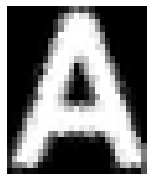

In [197]:
draw_digit([test_images[0]])

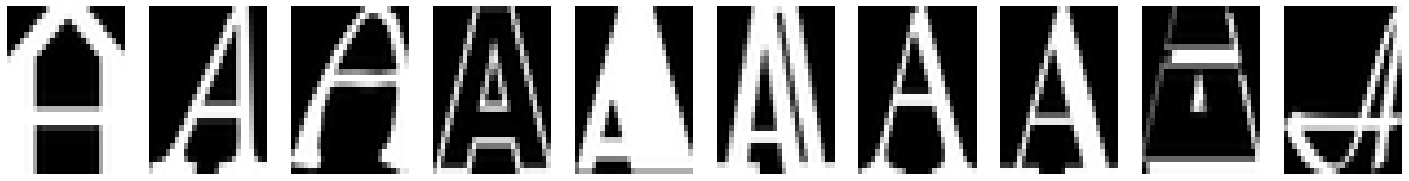

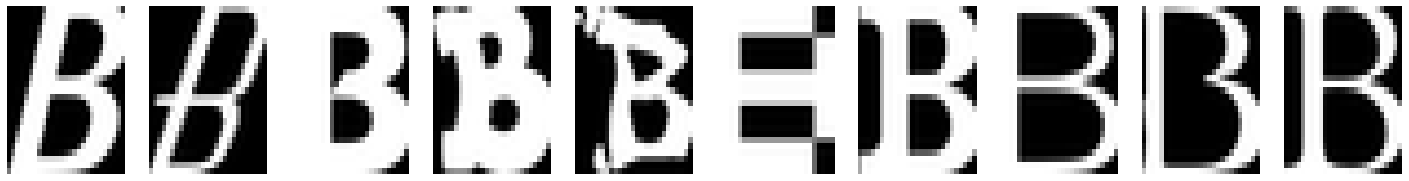

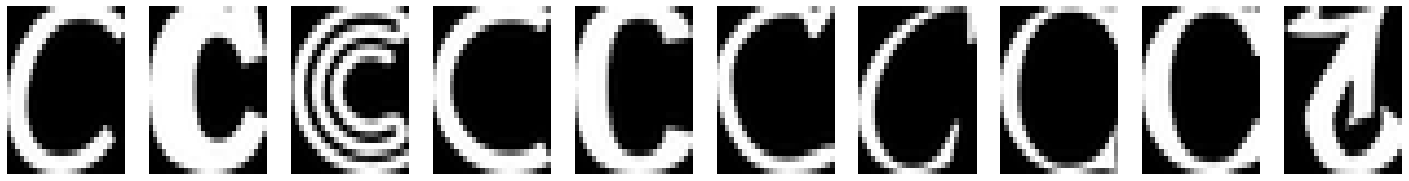

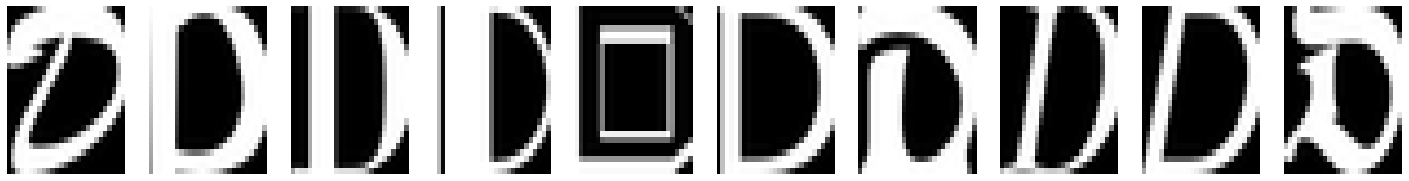

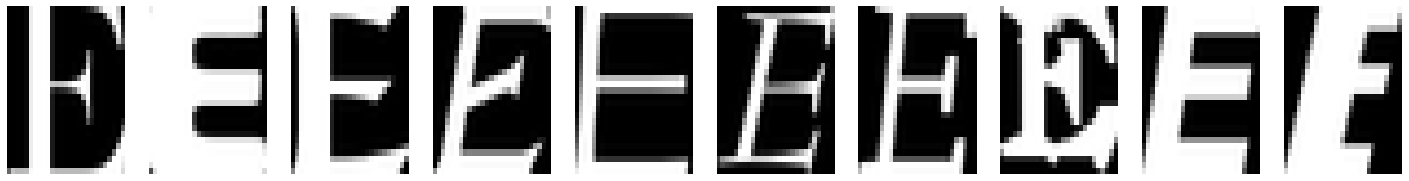

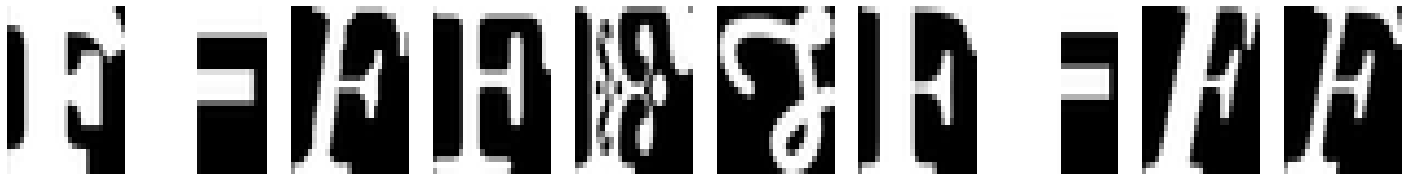

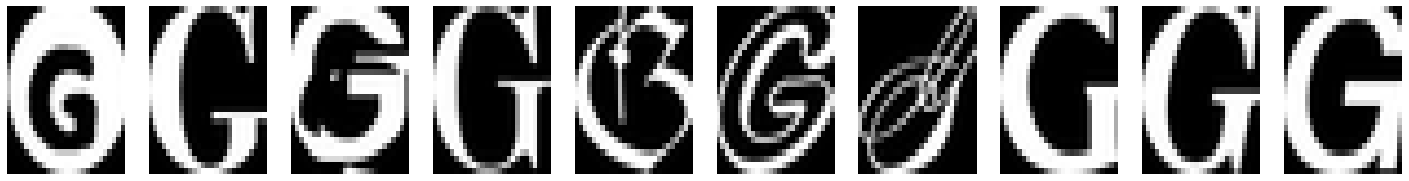

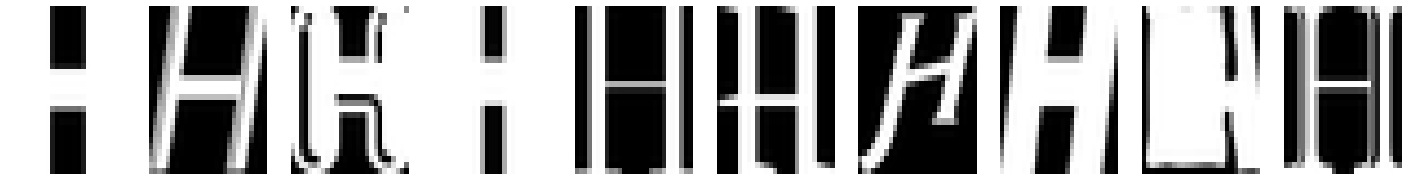

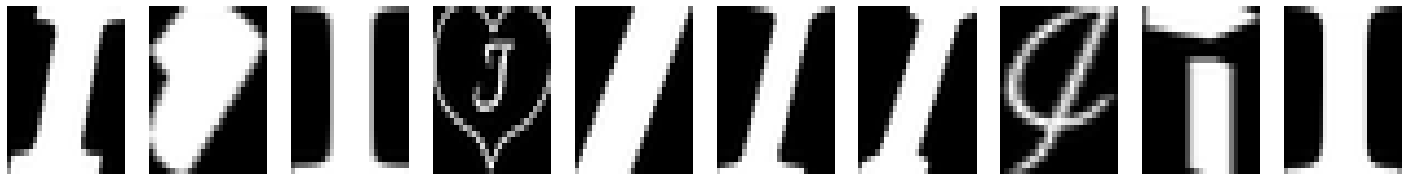

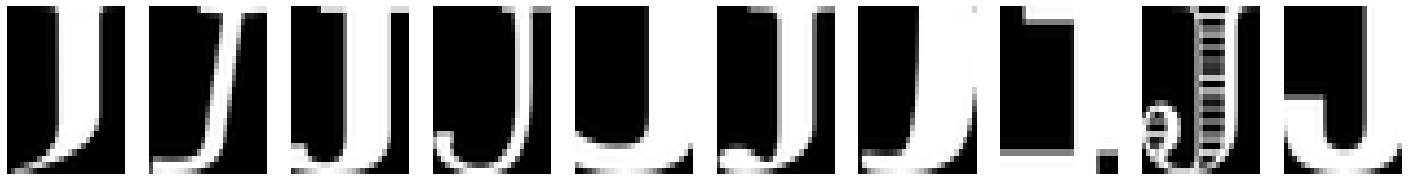

[None, None, None, None, None, None, None, None, None, None]

In [198]:
[draw_digit([test_images[1872*j+i] for i in rd.randint(1870,size=10)]) for j in range(10)]

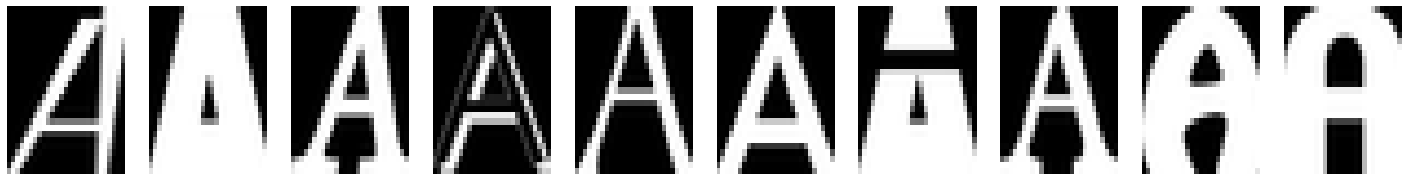

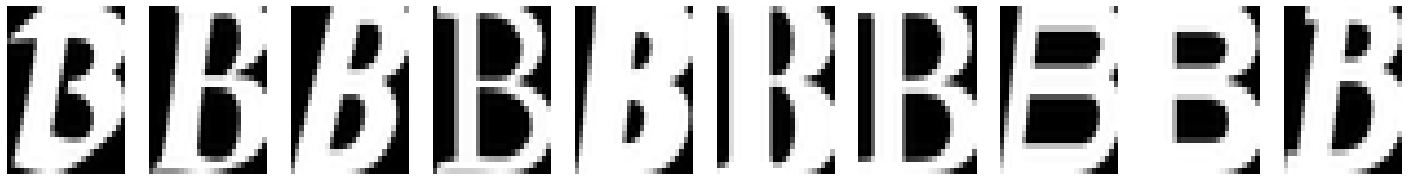

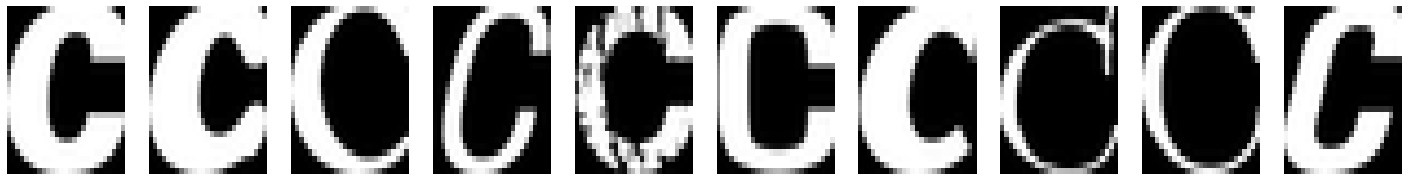

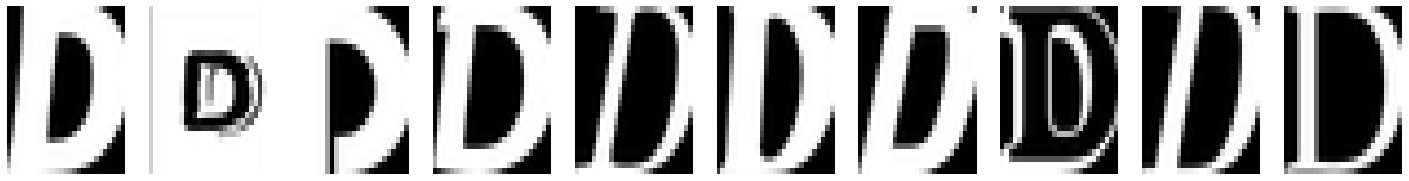

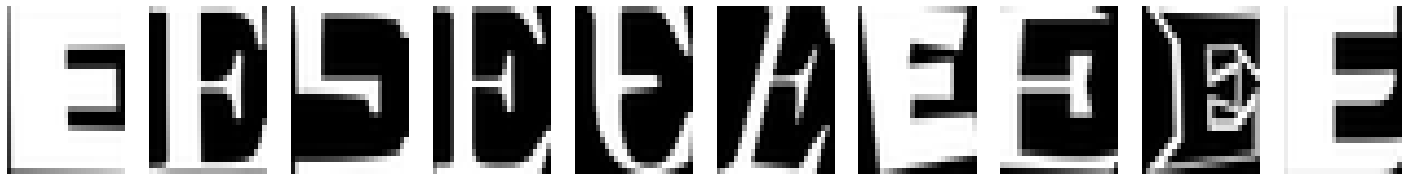

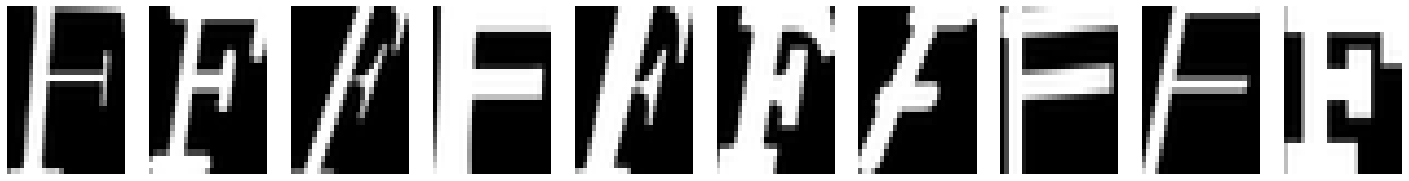

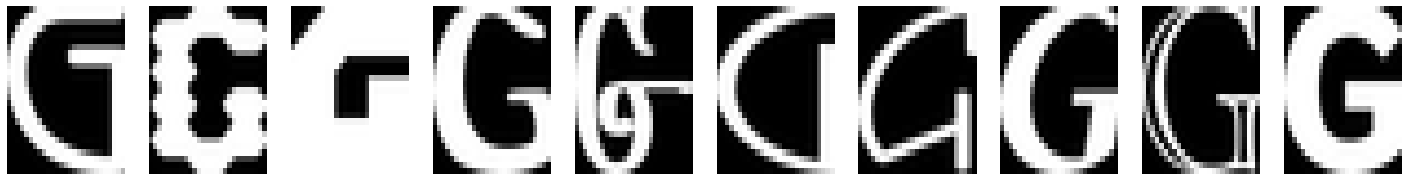

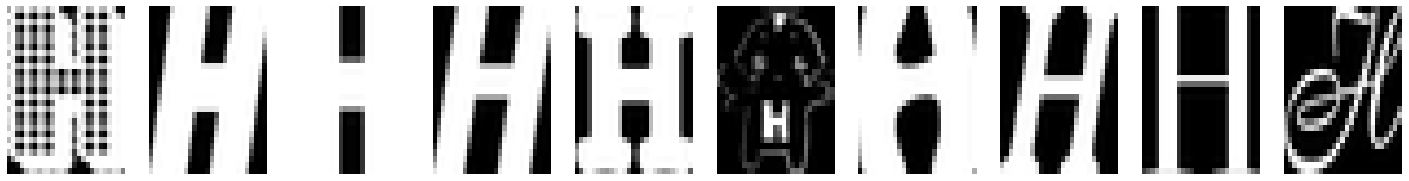

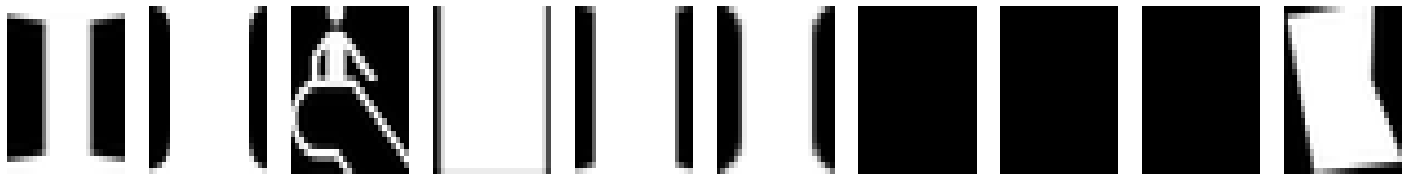

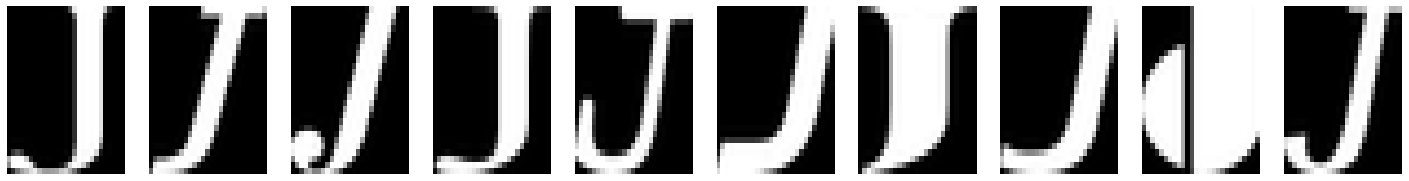

[None, None, None, None, None, None, None, None, None, None]

In [168]:
[draw_digit([dataset_list[j][i] for i in rd.randint(1873,size=10)]) for j in range(10)]

In [200]:
np.array(train_images).shape

(529114, 28, 28)